In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb

In [213]:
df = pd.read_excel('player_stats_value.xlsx')
df


,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
df2 = df.iloc[:, :143]
df2

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,NaN


In [215]:
df3 = df2.iloc[:,10:143]
df3['Age'] = df2['Age']
df3['Contract Years Left'] = df2['Contract Years Left']
df3['Value'] = df2['Value']
df3['Contract Years Left'].to_csv('file.csv')

In [216]:
rslt_df = df3.loc[df3['Contract Years Left'] != 'fail']
rslt_df

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),...,Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21),Age,Contract Years Left,Value
0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,5.0,0.0,...,4.0,0.0,0.0,109.0,7.0,8.0,46.7,22,1,144000000
1,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,2.0,0.0,...,0.0,0.0,0.0,96.0,37.0,40.0,48.1,21,3,117000000
2,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,1.0,0.0,...,2.0,0.0,0.0,155.0,90.0,129.0,41.1,28,3,108000000
3,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,154.0,5.0,22.0,18.5,21,5,90000000
4,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.0,0.0,...,2.0,0.0,0.0,191.0,21.0,52.0,28.8,29,2,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,1,180000
2071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,3,135000
2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,3,90000
2073,2.0,239.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,NaN,36,1,90000


In [217]:
rslt_df['Contract Years Left'] = rslt_df['Contract Years Left'].astype(int)
rslt_df.dtypes

C:\Users\camil\AppData\Local\Temp\ipykernel_12256\527357103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['Contract Years Left'] = rslt_df['Contract Years Left'].astype(int)


Starts (20/21)                float64
Min (20/21)                   float64
Total Mins/90 (20/21)         float64
Gls (20/21)                   float64
Ast (20/21)                   float64
                               ...   
Aerial Duel Lost (20/21)      float64
% Aerial Duels Won (20/21)    float64
Age                             int64
Contract Years Left             int32
Value                           int64
Length: 136, dtype: object

In [218]:
rslt_df.applymap(np.isreal).all(1)

0       True
1       True
2       True
3       True
4       True
        ... 
2070    True
2071    True
2072    True
2073    True
2074    True
Length: 2030, dtype: bool

<AxesSubplot:>

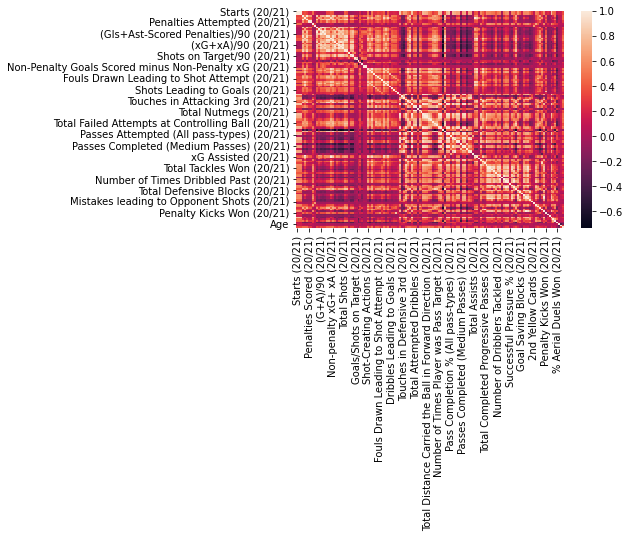

In [219]:
corr = rslt_df.corr()
sb.heatmap(corr)

In [220]:
corr
value_corr = corr.loc[corr['Value'] > 0]
value_corr = value_corr[['Value']]
value_corr
value_corr.style.applymap(lambda x: 'background-color : red' if x>.5 else ('background-color : orange' if x>.3 else 'background-color : green' if x>.1 else ''))

,Value
Starts (20/21),0.337256
Min (20/21),0.340036
Total Mins/90 (20/21),0.339977
Gls (20/21),0.444811
Ast (20/21),0.446802
Non-Penalty Goals (20/21),0.438059
Penalties Scored (20/21),0.275309
Penalties Attempted (20/21),0.271654
Yellow Cards (20/21),0.094952
Red Cards (20/21),0.017236


In [255]:
value_corr.nlargest(8,'Value')

,Value
Value,1.000000
Goal Creating Actions (20/21),0.518250
Total Carries in Forward Direction (20/21),0.512980
Number of Times Player was Pass Target (20/21),0.511899
Passes Leading to Goals (20/21),0.509611
Non-penalty xG+ xA (20/21),0.508318
Passes Leading to Shot Attempt (20/21),0.503195
Touches in Attacking Penalty Box (20/21),0.494847
Shot-Creating Actions (20/21),0.488848
Touches in Attacking 3rd (20/21),0.482792


In [222]:
df3 = df[['Value','Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
df3

,Value,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,144000000,28.0,261.0,1616.0,13.0,24.7,69.0,277.0
1,117000000,16.0,79.0,1100.0,10.0,25.9,39.0,190.0
2,108000000,25.0,150.0,1761.0,15.0,24.8,70.0,166.0
3,90000000,22.0,239.0,1693.0,17.0,13.4,87.0,134.0
4,90000000,14.0,218.0,2137.0,10.0,22.6,87.0,313.0
...,...,...,...,...,...,...,...,...
2070,180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,135000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,90000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,90000,0.0,0.0,35.0,0.0,0.0,0.0,0.0


In [223]:
df_reg = df3.fillna(0)
y=df_reg[['Value']]
x=df_reg[['Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]

In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [225]:
X_train

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
1786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,3.0,103.0,1320.0,0.0,5.2,28.0,40.0
1302,0.0,27.0,241.0,0.0,1.2,3.0,12.0
781,5.0,75.0,907.0,2.0,1.1,12.0,14.0
5,16.0,217.0,1290.0,9.0,14.9,80.0,132.0
...,...,...,...,...,...,...,...
1033,3.0,29.0,691.0,2.0,1.5,11.0,36.0
1731,0.0,44.0,314.0,0.0,0.5,10.0,6.0
763,6.0,56.0,507.0,5.0,2.9,15.0,46.0
835,1.0,0.0,471.0,1.0,0.4,2.0,0.0


In [226]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [227]:
regressor.score(X_test,Y_test)

0.42113749039887516

In [254]:
regressor.intercept_

array([1195702.79779037])

In [243]:
array = regressor.coef_
array
df9 = pd.DataFrame(array)
df9= df9.transpose()
df9['coef_'] = df9[0]
df9

,0,coef_
0,-1800.007459,-1800.007459
1,58910.561127,58910.561127
2,5322.257595,5322.257595
3,913839.192410,913839.192410
4,724491.203816,724491.203816
5,-211421.108044,-211421.108044
6,46157.065331,46157.065331


In [251]:
df_coef = pd.DataFrame(x.columns.transpose())
df_coef['coef'] = df9['coef_']
df_coef.columns=["Variable","Coefficient"]
df_coef = df_coef.set_index(["Variable"])
df_coef

,Coefficient
Variable,
Goal Creating Actions (20/21),-1800.007459
Total Carries in Forward Direction (20/21),58910.561127
Number of Times Player was Pass Target (20/21),5322.257595
Passes Leading to Goals (20/21),913839.192410
Non-penalty xG+ xA (20/21),724491.203816
Passes Leading to Shot Attempt (20/21),-211421.108044
Touches in Attacking Penalty Box (20/21),46157.065331
